# Moyennes par channels
Le but ici est de comparer les moyennes de chaques electrodes (EXG Channel 0-3) pour voir s'il y a des différences de potentiels.

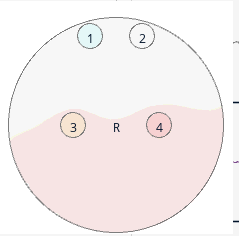

In [45]:
import pandas as pd
import numpy as np
import pickle
from scipy.fft import fft, fftfreq
from scipy.signal import butter, filtfilt, iirnotch

In [2]:
with open("/home/cr0n/Projet EEG/EEG-Intentions/data/Notebook 1/droite_active_epochs.pkl", "rb") as f:
    droite_active = pickle.load(f)
with open("/home/cr0n/Projet EEG/EEG-Intentions/data/Notebook 1/gauche_active_epochs.pkl", "rb") as f:
    gauche_active = pickle.load(f)
with open("/home/cr0n/Projet EEG/EEG-Intentions/data/Notebook 1/avancer_active_epochs.pkl", "rb") as f:
    avancer_active = pickle.load(f)
with open("/home/cr0n/Projet EEG/EEG-Intentions/data/Notebook 1/reculer_active_epochs.pkl", "rb") as f:
    reculer_active = pickle.load(f)
with open("/home/cr0n/Projet EEG/EEG-Intentions/data/Notebook 1/droite_repos_epochs.pkl", "rb") as f:
    droite_repos = pickle.load(f)
    

In [3]:
type(droite_active[0])


pandas.core.frame.DataFrame

In [4]:
droite_active[0].head()

,Sample Index,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,Timestamp,Status
1275,35.0,-2170.262074,-2207.174887,-2056.735541,-1889.608762,1.749061e+09,active
1276,35.0,-2168.414564,-2204.489639,-2054.985268,-1842.901151,1.749061e+09,None
1277,36.0,-2166.409977,-2205.095503,-2052.546853,-1912.343614,1.749061e+09,None
1278,36.0,-2169.446776,-2207.818150,-2053.833379,-1880.838697,1.749061e+09,None
1279,37.0,-2173.867338,-2206.688700,-2052.232702,-1881.388462,1.749061e+09,None


In [5]:
droite_active = [df.drop(columns=['Sample Index', ' Timestamp', 'Status']) for df in droite_active]
gauche_active = [df.drop(columns=['Sample Index', ' Timestamp', 'Status']) for df in gauche_active]
avancer_active = [df.drop(columns=['Sample Index', ' Timestamp', 'Status']) for df in avancer_active]
reculer_active = [df.drop(columns=['Sample Index', ' Timestamp', 'Status']) for df in reculer_active]

droite_repos = [df.drop(columns=['Sample Index', ' Timestamp', 'Status']) for df in droite_repos]

droite_active[0].head()



,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3
1275,-2170.262074,-2207.174887,-2056.735541,-1889.608762
1276,-2168.414564,-2204.489639,-2054.985268,-1842.901151
1277,-2166.409977,-2205.095503,-2052.546853,-1912.343614
1278,-2169.446776,-2207.818150,-2053.833379,-1880.838697
1279,-2173.867338,-2206.688700,-2052.232702,-1881.388462


In [6]:
# Concaténation pour avoir la moyenne des toutes les epochs
moyennes_droite = pd.concat(droite_active).mean(numeric_only=True)
moyennes_gauche = pd.concat(gauche_active).mean(numeric_only=True)
moyennes_avancer = pd.concat(avancer_active).mean(numeric_only=True)
moyennes_reculer = pd.concat(reculer_active).mean(numeric_only=True)
moyennes_droite_repos = pd.concat(droite_repos).mean(numeric_only=True)

display(moyennes_droite)
type(moyennes_droite)



EXG Channel 0   -2174.132712
EXG Channel 1   -2199.400409
EXG Channel 2   -2057.628248
EXG Channel 3   -1885.454636
dtype: float64

pandas.core.series.Series

In [22]:
# Crée un DataFrame directement à partir d’un dict de Series
df_moyennes = pd.DataFrame({
    'gauche': moyennes_gauche,
    'droite': moyennes_droite,
    'droite_repos': moyennes_droite_repos,
    'avancer': moyennes_avancer,
    'reculer': moyennes_reculer,
    
})


display(df_moyennes)

,gauche,droite,droite_repos,avancer,reculer
EXG Channel 0,-2166.743041,-2174.132712,-2162.395627,-2166.305561,-2171.052505
EXG Channel 1,-2182.947400,-2199.400409,-2189.618499,-2168.329671,-2178.592777
EXG Channel 2,-2042.520185,-2057.628248,-2056.853700,-2026.483131,-2011.566833
EXG Channel 3,-1874.769328,-1885.454636,-1884.149810,-1865.019672,-1858.054051


# Résultats

1. Comme on peut le voir sur le barplot, il existe une différence de potentiel significative pour chaque électrode, **sauf sur le channel 0**, qui affiche une moyenne d’environ **-2166** pour les classes *avancer* et *gauche*. Cela suggère que ce canal ne contribue peut-être pas efficacement à la discrimination entre ces intentions.

Nous allons maintenant effectuer une analyse des **moyennes par epoch** pour la classe **"avancer"**, afin d’observer si des variations apparaissent entre les différentes secondes de l’enregistrement.

# Moyennes par epochs

<Axes: title={'center': 'Moyennes par epochs'}>

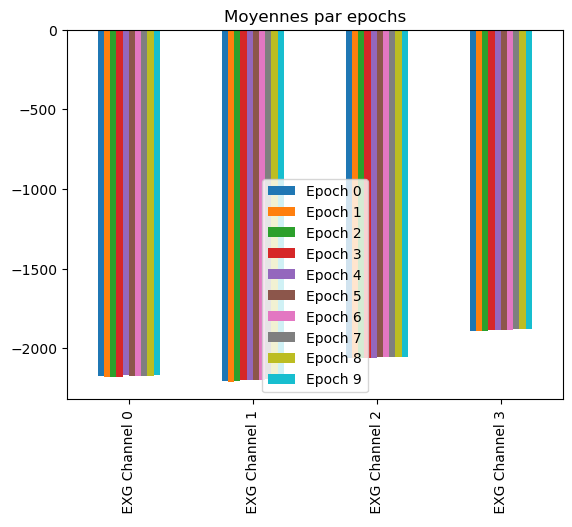

In [25]:
# Créer une liste de Series (une par epoch)
liste_moyennes = [epoch.mean(numeric_only=True) for epoch in droite_active]

# Crée le DataFrame final avec chaque ligne = un epoch
df_epochs = pd.DataFrame(liste_moyennes)

## Possibilité de le faire en une ligne: df_epochs = pd.DataFrame([epoch.mean(numeric_only=True) for epoch in droite_active])

# Facultatif : nommer les epochs
df_epochs.index = [f"Epoch {i}" for i in range(len(df_epochs))]

# Plot : moyennes par epoch, transposé
df_epochs.T.plot(
    kind="bar",
    title="Moyennes par epochs",
)

In [9]:
display(df_epochs.T)

,Epoch 0,Epoch 1,Epoch 2,Epoch 3,Epoch 4,Epoch 5,Epoch 6,Epoch 7,Epoch 8,Epoch 9
EXG Channel 0,-2173.469735,-2179.250322,-2178.493915,-2178.051569,-2170.599387,-2175.434929,-2172.513042,-2171.430190,-2171.481884,-2170.602147
EXG Channel 1,-2205.183482,-2209.461834,-2205.025551,-2200.808608,-2200.272174,-2198.987978,-2195.930735,-2194.352643,-2192.333124,-2191.647962
EXG Channel 2,-2063.379691,-2061.592010,-2060.545238,-2059.774557,-2059.265291,-2056.941468,-2056.042001,-2054.361269,-2052.838071,-2051.542883
EXG Channel 3,-1891.350566,-1890.218909,-1888.736630,-1887.904703,-1886.677077,-1884.460308,-1883.572155,-1881.389847,-1880.736369,-1879.499799


1. Les signaux sont beaucoup plus stables à partir de la seconde 4 (epoch 4), cela explique le spike qu'on voit au début sur le notebook #1

# Transformée de Fourier (FFT)
Obtenir les fréquences présentes dans les signaux

| **Bande**            | **Fréquence (Hz)** | **Localisation**                   | **États / Fonctions principales**                                                              | **Commentaires / Découvertes**                                       |
| -------------------- | ------------------ | ---------------------------------- | ---------------------------------------------------------------------------------------------- | -------------------------------------------------------------------- |
| **Delta (δ)**        | 0.5 – 4            | Diffuse                            | Sommeil profond, régénération, parfois présent à l’éveil                                       | Introduit par W. Grey Walter (1936)                                          |
| **Theta (θ)**        | 4 – 7.5            | Temporale, frontale (parfois)      | Somnolence, méditation profonde, accès à l’inconscient, inspiration créative                   | Walter & Dovey (1944) ; indicateur de niveau d'éveil                 |
| **Alpha (α)**        | 8 – 13             | Occipital, pariétal (postérieur)   | Veille calme, repos visuel, relaxation sans concentration, yeux fermés                         | Berger (1929) ; bloqué par l'ouverture des yeux                      |
| **Mu (μ)**           | ~7 – 13            | Régions centrales (rolandiques)    | Repos moteur, inhibé par le mouvement ou le toucher                                            | Corrélé au rythme bêta central ; blocable par activité motrice       |
| **Beta (β)**         | 14 – 26            | Frontale et centrale               | Attention active, raisonnement, activité cognitive, résolution de problème, parfois panique    | Basse amplitude (< 30 μV) ; bloqué par activité motrice              |
| **Gamma (γ lent)**   | 30 – 70            | Diffuse / spécifique (selon tâche) | Traitement cognitif spécifique, synchronisation liée aux événements (ERS)     | Jasper & Andrews (1938) ; mouvements fins (doigts, langue)           |
| **Gamma (γ rapide)** | > 70               | Bilatérale ou localisée            | Traitement cognitif, conscience accrue, attention soutenue, perception sensorielle | Fréquences parfois observées jusqu'à 75 Hz dans certains états alpha |

In [93]:
fs = 200  # Hz
bandes = {
    "delta": (0.5, 4),
    "theta": (4, 7.5),
    "alpha": (8, 13),
    "mu": (7, 13),
    "beta": (14, 26),
    "gamma_lent": (30, 70),
    "gamma_rapide": (70, fs/2),
}

# === FFT ===

# Pour avoir toutes les epochs concaténées en un seul signal
EXGChannels = pd.concat(droite_active)

# N : longueur du signal pour appliquer FFT
# fftfreq : génère les fréquences associées aux coefficients de la FFT.
# 1/fs : 1 échantillon = 1 seconde découpée en 200
N = len(EXGChannels)
freqs = fftfreq(N, 1/fs)

# === Nyquist-Shannon & Filtres ===
# Théorème de Nyquist-Shannon : Pour pouvoir reconstruire un signal de fréquence f, il faut l’échantillonner à au moins 2f. Sinon, aliasing.
# Comme l’échantillonnage est à 200 Hz, la fréquence maximale exploitable sans aliasing est 200/2 = 100 Hz
#
# Filtres appliqués pour éliminer le bruit: 
# -lowpass (0.5 hz)
# -highpass (100 Hz)
# -notch (60 hz) à noter que cette fréquence peut changer selon la région ex. 50 Hz en Europe
#
#  On garde donc les fréquences entre 0.5 Hz et 100 Hz, excluant 59–61 Hz.
mask_nyquist_filtres = (
    (freqs > 0.5) & 
    (freqs <= 100) &
    ~((freqs >= 59) & (freqs <= 61)) # On peut pas écrire == 50 car float
)
freqs_utile = freqs[mask_nyquist_filtres]

# === Analyse de chaque canal ===
for channel in EXGChannels.columns :
    print(f"\n=== {channel.strip()} ===")

    # FFT contient une AMPLITUDE et une PHASE, ce n’est donc pas interprétable directement, il faut transformer avec ->
    # amplitude = np.abs(Y) (à quel point la fréquence est présente)
    # puissance = np.abs(Y)**2 (quantité d’activité à une fréquence)
    Y = fft(EXGChannels[channel])
    P = np.abs(Y)**2  # Puissance spectrale

    # Sélection des fréquences utiles
    P_utile = P[mask_nyquist_filtres]

    # Calcule l'intégrale de y (en µV²) par rapport à x (en Hz) selon la règle du trapèze (aire sous la courbe P(f))
    total_power = np.trapezoid(P_utile, freqs_utile)

    # Analyse par bande
    puissances = {}
    for nom, (fmin, fmax) in bandes.items():
        mask = (freqs_utile >= fmin) & (freqs_utile <= fmax)
        p = np.trapezoid(P_utile[mask], freqs_utile[mask])
        pct = (p / total_power) * 100
        puissances[nom] = {'power': p, 'pct': pct}

    # Affichage des résultats
    for nom in puissances:
        print(f"{nom.upper():<12} : {puissances[nom]['power']:.2f} µV²\t({puissances[nom]['pct']:.2f}%)")



=== EXG Channel 0 ===
DELTA        : 332973513.85 µV²	(87.85%)
THETA        : 14480267.85 µV²	(3.82%)
ALPHA        : 5056561.21 µV²	(1.33%)
MU           : 6691608.77 µV²	(1.77%)
BETA         : 7475530.75 µV²	(1.97%)
GAMMA_LENT   : 10217164.41 µV²	(2.70%)
GAMMA_RAPIDE : 5960885.99 µV²	(1.57%)

=== EXG Channel 1 ===
DELTA        : 271429032.68 µV²	(87.37%)
THETA        : 12419120.83 µV²	(4.00%)
ALPHA        : 4380357.36 µV²	(1.41%)
MU           : 6010641.02 µV²	(1.93%)
BETA         : 6143070.57 µV²	(1.98%)
GAMMA_LENT   : 8505999.66 µV²	(2.74%)
GAMMA_RAPIDE : 5221036.80 µV²	(1.68%)

=== EXG Channel 2 ===
DELTA        : 52704894.41 µV²	(53.77%)
THETA        : 7036972.47 µV²	(7.18%)
ALPHA        : 6876815.24 µV²	(7.02%)
MU           : 9724014.27 µV²	(9.92%)
BETA         : 11263089.17 µV²	(11.49%)
GAMMA_LENT   : 9728585.80 µV²	(9.92%)
GAMMA_RAPIDE : 6054031.56 µV²	(6.18%)

=== EXG Channel 3 ===
DELTA        : 46090697.21 µV²	(55.81%)
THETA        : 4010186.78 µV²	(4.86%)
ALPHA        : 3814

# Résultats et Analyse :
1. On observe que la bande DELTA, normalement associée au sommeil profond, est fortement surreprésentée dans tous les canaux. Possiblement parce que j'étais un peu fatigué et assis à une table au "repos", sans faire autre chose que penser "droite".

2. Les canaux 0 et 1 (en avant de la tête) ne présentent pas une activité particulière, légèrement prononcée dans les gammas, mais sinon plutôt "inactifs" en delta (environ 87%).

3. Les canaux 2 et 3 (chaque côté des oreilles) montrent une activité un peu plus intéressante et répartie:

- Delta encore dominant, mais moins (environ 50%)
- mu  = repos → ce qui fait du sens car j’étais assis lors de l’acquisition des signaux  
- bêta = attention active → ce qui fait du sens car je réfléchissais fort à aller à droite  
- gamma = traitement cognitif → ce qui fait du sens car je réfléchissais fort à aller à droite

# Hypothèses :
1. C’est probablement sur canal 2 et 3 qu'on captera des différences entre “droite”, “repos”, “gauche”, etc.
2. Penser "droite" fait travailler les ondes gamma, mais plus particulièrement sur les côtés de la tête (canaux 2 et 3).

On va maintenant faire la comparaison avec "droite repos", "gauche, "avancer" et "reculer" pour voir les différences.


# Transformée en ondelettes (CWT / DWT)
Permet une analyse temps-fréquence pour voir quand les ondes alpha, beta, etc. apparaissent. (changements dans le temps)





# Band Power

# CSP (Common Spatial Patterns)
filtrage spatial supervisé pour maximiser la séparation entre deux classes (ex. gauche/droite).

# PCA / ICA / SVD (réduction de dimension / artefacts)
ICA (Independent Component Analysis) est utilisé pour enlever les artefacts (ex. clignements des yeux).

PCA/SVD peuvent servir à réduire la dimension des données avant classification.


